# Documentation notes
This code computes the net marginal savings function for a set of candidate items for prepo. Input values are collected, marginal savings functions are computed and plotted, and results are saved to a file.
## Assumptions
- Time between disasters is exponentially distributed (this can easily be changed to any other preferred distribution)
- The ratio of local-to-prepo cost is a truncated normal random variable
- Demand is a normal random variable with a mean that (linearly) depends on local-to-prepo cost
- Local supply is a composite discrete/continuous random variable: takes on a value of 0 with a specified probability $Q_0$ and is a normal random variable with probability $1 - Q_0$. In the event that it is a normal random variable, its mean (linearly) depends on local-to-prepo cost. 


## Notation
### Data imported from Excel file that is saved in 'csv' format
m_T = average time between disasters (exponential random variable) 

#### The following data are specific to each item
h = inventory holding cost per dollar-period<br>
v = ratio of shortage-to-prepo cost (v > 1)<br>
c = prepo cost per unit of the item

$\tilde a$ = random ratio of local-to-prepo cost ratio (truncated normal random variable; realization is without tilde)<br>
min_a = minimum local-to-prepo cost ratio<br>
max_a = maximum local-to-prepo cost ratio<br>
mean_a = mean local-to-prepo cost ratio<br>
stdev_a = standard deviation of local-to-prepo cost ratio

#### The  demand and local supply parameters below are in the same unit as the unit cost parameter c (eg, if c is cost per kg, then demand and supply parameters are in kgs) 
m_D = base mean demand<br>
a_D = coefficient on  local-to-prepo cost ratio for demand (eg, a_D < 0 means negative correlation between local cost and demand, and a_D = 0 implies independence, see __Note 1__ below)<br>
stdev_D = standard deviation of demand for fixed value of local-to-prepo cost ratio<br>
$\tilde z_D$ = standard normal random variable associated with demand <br>
$\tilde D$ = m_D + a_D$\tilde a$ + stdev_D$\tilde z_D$<br>

Q_0 = probability that local supply is zero<br>
m_Q = base mean local supply (given not zero)<br>
a_Q = coefficient on  local-to-prepo cost ratio for local supply (given not zero)<br>
stdev_Q = standard deviation of local supply (given not zero) for fixed value of local-to-prepo cost ratio<br>
$\tilde z_Q$ = standard normal random variable associated with local supply <br>
$\tilde Q$ = 0 w.p. Q_0 (i.e., the probability there is no local supply is Q_0) <br>
$\tilde Q$ = m_Q + a_Q$\tilde a$ + stdev_Q$\tilde z_Q$ w.p. 1- Q_0 

rho = Pearson correlation coefficient for $(\tilde z_D,\tilde z_Q)$<br>

__Note 1__: The Pearson correlation coefficient for $\tilde a$ and random demand $D$ is the following:
\begin{align}
  \rho_{\tilde a \tilde D} & = \frac{E\left[(\tilde a - \mu_{\tilde a})(\tilde D - \mu_{\tilde D})\right]}{\sigma_{\tilde a}\sigma_{\tilde D}} 
  = \frac{E\left[(\tilde a - \mu_{\tilde a})(\text{stdev_D} \tilde z_D + \text{a_D} (\tilde a - \mu_{\tilde a}))\right]}{\sigma_{\tilde a}\left[\text{stdev_D}^2 + \text{a_D}^2 \sigma_{\tilde a}^2\right]^{1/2}} 
    = \frac{\text{a_D}\sigma_{\tilde a}^2}{\sigma_{\tilde a}\left[\text{stdev_D}^2 + \text{a_D}^2 \sigma_{\tilde a}^2\right]^{1/2}} \\
        &= \frac{\text{a_D}}{\left[\left(\frac{\text{stdev_D}}{\sigma_{\tilde a}}\right)^2 + \text{a_D}^2\right]^{1/2}}
\end{align}


### Data to control the plot functions

min_x = minimum value of prepo investment in an item (assumed integer)<br>
max_x =  maximum value of prepo investment in an item (assumed integer)<br>
incr_x = step size for prepo investment (assumed integer)<br>
n =  sample size for computuations (assumed integer)<br>
seed = True or False to indicate whether (True) or not (False) the same intial random number seed should be used for each sample


# Computations

We compute the marginal savings, marginal cost, and net marginal savings as a function of prepo spend x. Toward this end, we will use 4 random variables:

P_a = $(\tilde{a} - 1)^+$<br>
P_D = $\bar{F}_D(x | \tilde{a})$<br>
P_S = $\bar{F}_{D-Q}(x | \tilde{a})$<br>
P_cx =$\left[(\tilde{a} - 1)^+\right]  \times \left[\left(\bar{F}_D(x | \tilde{a})- \bar{F}_{D-Q}(x | \tilde{a})\right)\right]$

The relevant functions are computed as follows:

m_s(x) = (v - 1)E[P_a] + E[P_cx]<br>
m_c = h $\times$ m_T<br>
m(x) = m_s(x) - m_c

# Input data
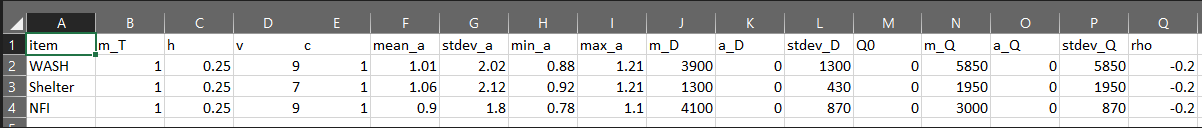

The above screenshot illustrates the format for the csv input file. The meaning of each column is described below:

Item: desired name for the item in question

m_T: average number of periods between relief events.<br>
- The choice of period (eg, day, month, year) is arbitrary. All that is required is that the same period be used in the specification for all period-based parameters (i.e., m_T and h). Note that there is a single value of m_T (ie, m_T does not vary across items). The code only reads the value of m_T from the first item (WASH in the screenshot above). The values of m_T for the other items are ignored.

h: prepo inventory holding cost per unit-period.<br>
- This includes are all relevant costs of holding inventory (eg, obsolencence, holding cost charges, opportunity cost of funds tied up in inventory, etc.). As noted above, the value of h must be based on the same period as the value of m_T.

v: shortage penalty.<br>
- This is a measure of urgency or importance of the item during a relief event. It may be interpreted as the cost of human suffering if a unit of the product is not available for someone in need.

c: prepo cost per unit. The unit cost is an estimate of the total landed cost at the relief event.<br>
- It includes the purchase cost, transportation cost into the depot (where prepo is stored), and transportation cost to the relief event.

mean_a: expected value of local-to-prepo cost per unit.<br>
- For example, if mean_a = 1.01, it means that buying the item from the local market is, on average, 1% more expensive than buying the same item beforehand (i.e., prepo) and shipping it to the area of the relief event.

stdev_a: standard deviation in local-to-prepo cost per unit.<br>

min_a: minimum possible value of local-to-prepo cost per unit.<br>

max_a: maximum possible value of local-to-prepo cost per unit.
- As noted above, local-to-prepo cost per unit is assumed to be a truncated normal random variable. This means that its value will be between min_a and max_a (i.e., truncation). The probability density function appears like the normal probability density function (with mean = mean_a and standard deviation = stdev_a) except the function takes on a value of zero outside the interval of \[min_a, max_a\] and is inflated (relative to a pure normal density ) on the interval \[min_a, max_a\] (so that the random variable takes on a value within this range with probability 1). As the value of stdev_a increases, the probability distribution becomes closer and closer to a uniform random variable on interval \[min_a, max_a\].
- The following inquality must hold for the values: min_a $\le$ mean_a $\le$ max_a.
- As a point of clarification, mean_a is the mean of the normal random variable prior to truncation. If min_a and max_a are the same distance away from mean_a, then mean_a is also the expected value of the truncated normal random value. If mean_a - min_a is more than max_a - mean_a, then the mean of the truncated normal random variable will be below mean_a. Similarly, mean of the truncated normal random variable will be above mean_a if mean_a - min_a is less than max_a - mean_a.

m_D: intercept of the expected value of demand (or need) for the item during a relief event.

a_D: coefficient on the realized value of local-to-prepo cost per unit.

stdev_D: standard deviation of demand (or need) for the item during a relief event.
- As noted above, demand is assumed to be a normal random variable with mean dependent on the realized value of $\tilde a$ (i.e., the mean of the normal random variable is m_D + a_D $\times \tilde a$. 
- The value of a_D is used to control the correlation between local-to-prepo cost and demand. Nominally, the value of a_D is either zero (demand and local supply cost are independent) or positive. A positive value of a_D introduces positive correlation between demand and local unit cost. This can arise in practice because local supply is likely to be tight when demand is high, putting upward pressure on local prices.  

Q_0: probability that there will be no supply of the item.
- Local supply may be zero for several reasons. First, the item may not be sold in some geographical regions where a relief event could occur. Second, a major disaster could wipe out all local supply, even if available prior to the relief event. Third, management may prefer to not use local supply even when available so that local humanitarian organizations that do not have prepo inventory are able to purchase and distribute local supplies. 

m_Q: intercept of the expected value of local supply for the item during a relief event, given that it is available (with probability 1 - Q_0).

a_Q: coefficient on the realized value of local-to-prepo cost per unit.

stdev_Q: standard deviation of local supply of the item during a relief event.
- As noted above, supply is assumed to be a normal random variable with mean dependent on the realized value of $\tilde a$ (i.e., the mean of the normal random variable is m_Q + a_Q $\times \tilde a$. 
- The value of a_Q is used to control the correlation between local-to-prepo cost and local supply. Nominally, the value of a_Q is either zero (local supply and cost are independent) or ngative. A negative value of a_Q introduces negative correlation between local supply and local unit cost. This can arise in practice because limited local supply may tend to put upward pressure on local prices. 

rho: Pearson correlation coefficient for $(\tilde z_D,\tilde z_Q)$<br>
- The values of a_D and a_Q also control correlation between demand and supply of an item (as well as correlation wtih local-to-prepo cost). If these values are not zero, then it may be suitable to set rho = 0. A nonzero value of rho is more likely to be used when a_D = a_Q = 0. This approach allows the model to treat local-to-prepo cost as independent of demand and supply but stil allow for correlation between demand and supply (e.g., as in the example calibration above).

## The next block imports necessary modules & defines the necessary functions

In [1]:
# Import the necessary modules
import numpy as np
import scipy.stats as sp
import pandas as pd
import matplotlib.pyplot as plt
# import seaborn as sns  # this module contains plot functionality ... may decide to use later  

# Functions defined below
def Plot_fn(file_name,min_x,max_x,incr_x,n,seed='False',
            ind_plot_by_x='False',ind_plot_by_m='False',
            all_plot_by_x='False',all_plot_by_m='False'):
    '''Generate plots of prepo spend & net marginal savings for each item, 
       return a data frame containing the sample statistics '''
    ## Load in the calibration & control parameters
    inputs = pd.read_csv(file_name)
    ## With each of the following insert statements, the parameter value is inserted to the 1st column of the data frame
    inputs.insert(1,'seed',seed,False)
    inputs.insert(1,'n',n,False)
    inputs.insert(1,'incr_x',incr_x,False)
    inputs.insert(1,'max_x',max_x,False)
    inputs.insert(1,'min_x',min_x,False)
    #print(inputs.shape)
    ## Initialize a data object that will store the summary statistics for all items
    z = []
    ## Compute & plot the budget & net marginal savings functions for each item
    for i in range(inputs.shape[0]):
        ## Compute & store net marginal savings for the item
        data = MargVal_calc(tuple(inputs.iloc[i][0:]))
        z.append(data)
        ## Create a plot by prepo spend for each item if requested
        if ind_plot_by_x:
            plt.plot(data['x'],data['m'])
            plt.ylabel('net marginal savings')
            plt.xlabel('prepo spend')
            plt.grid()
            plt.title(inputs.iloc[i][0])
            plt.show()
        ## Create a plot by net marginal savings for each item if requested
        if ind_plot_by_m:
            plt.plot(data['m'],data['x'])
            plt.xlabel('net marginal savings')
            plt.ylabel('prepo spend')
            plt.grid()
            plt.title(inputs.iloc[i][0])
            plt.show()
    ## Create a plot by prepo spend for all items if requested
    if all_plot_by_x:
        curve_labels = []
        for i in range(len(z)):
            plt.plot(z[i]['x'],z[i]['m'])
            curve_labels = curve_labels +[z[i].iloc[0]['item']]
        plt.xlabel('prepo spend')
        plt.ylabel('marginal savings')
        plt.grid()
        plt.legend(labels=curve_labels)
        plt.show()
    ## Create a plot by net marginal savings for all items if requested
    if all_plot_by_m:
        curve_labels = []
        min_m,max_m = 0, 10**10                # outer limits of common margin range
        for i in range(len(z)):
            plt.plot(z[i]['m'],z[i]['x'])
            curve_labels = curve_labels +[z[i].iloc[0]['item']]
            min_m = max(min_m,z[i]['m'].min())  
            max_m = min(max_m,z[i]['m'].max())  
        plt.xlabel('marginal savings')
        plt.ylabel('prepo spend')
        if min_m < max_m:                       # Check m values overlap for all items; if so, plot over the range
            plt.xlim(min_m,max_m)               
        plt.grid()
        plt.legend(labels=curve_labels)
        plt.show()
    ## Plot total prepo spend by marginal savings, if m values overlap across all items
    if min_m < max_m:                       # Only plot sum if there is a common range of m across the items
        ## Store the data in a new data frame to be sorted by m
        z_df = z
        ## Sort by m & combine all of the m values in the range of [min_m, max_m] for interpolation
        for i in range(len(z_df)):
            z_df[i] = z_df[i].sort_values('m')
            if i == 0:
                list_m = z_df[i]['m']
            else:
                list_m = pd.concat([list_m,z_df[i]['m']])
        ## For m_list, drop values out outside of the range, eliminate duplicates
        list_m = list_m[(list_m>=min_m)&(list_m<=max_m)]
        list_m = list_m.drop_duplicates()
        ## For each item, interpolate to obtain x values for each m in list_m & add to sum
        for i in range(len(z_df)):
            if i == 0:
                y = np.interp(list_m, z_df[i]['m'], z_df[i]['x'])
            else:
                y = y + np.interp(list_m, z_df[i]['m'], z_df[i]['x'])
        ## Now plot total prepo spend by marginal savings
        plt.plot(list_m,y,'b.')
        plt.xlabel('marginal savings')
        plt.ylabel('total prepo spend')
        plt.grid()
        plt.show()
    return z

def MargVal_calc(params):
    '''Computes net marginal savings function (per currency unit) over a range of prepo levels for the item'''
    ## initialize variables
    min_x = int(params[1])          # Define as integer
    max_x = int(params[2])          # Define as integer
    incr_x = int(params[3])         # Define as integer
    n = int(params[4])              # Define as integer
    seed = params[5]
    m_T = params[6]
    h = params[7]
    v = params[8]
    c = params[9]
    mean_a = params[10]
    stdev_a = params[11]
    min_a = params[12]
    max_a = params[13]
    ## Demand & supply parameters are converted from the item natural unit to currency units of the item
    m_D = params[14]*c
    a_D = params[15]*c
    stdev_D = params[16]*c
    Q0 = min(max(0,params[17]),1)   # Make sure that Q0 is a valid probability
    m_Q = params[18]*c
    a_Q = params[19]*c
    stdev_Q = params[20]*c
    rho = params[21]
    m_c = h * m_T                   # Compute marginal cost for the item
    z = []                          # Initialize the data storage object to null
    for x in range(min_x,max_x+1,incr_x):
        sample = Sample_gen(x,n,seed,mean_a,stdev_a,min_a,max_a,m_D,a_D,stdev_D,Q0,m_Q,a_Q,stdev_Q,rho)
        means = sample[['x','P_a','P_D','P_S','P_cx']].mean()
        m_s = (v-1)*means['P_S'] + means['P_cx'] 
        m = m_s - m_c
        z.append([params[0]] + means.tolist() + [m_s,m_c,m])
        print(f'Item: {params[0]}, x = {x}, marginal savings = {m:.2f}')
    z = pd.DataFrame(z)
    z.columns = ['item','x','E[P_a]','E[P_D]','E[P_S]','E[P_cx]','m_s','m_c','m']
    return z

def Sample_gen(x,n,seed,mean_a,stdev_a,min_a,max_a,m_D,a_D,stdev_D,Q0,m_Q,a_Q,stdev_Q,rho):
    '''Generates a sample of size n containing the 4 elements needed to compute marginal
      savings for a given prepo investment x. A data frame containing the 4 elements is returned.'''
    ## Initialize random numnber seed if defined
    if seed:
        np.random.seed(100)                     # Can change the seed value; current at 100
    ## Initialize object to store the elements of the sample
    z = []
    ## Loop to generate the n elements of the sample
    for i in range(1,n+1):
        ## Generate random a (local-to-prepo cost ratio) & compute P_a = max{a-1,0}
        a = sp.truncnorm.rvs((min_a-mean_a)/stdev_a,
                             (max_a-mean_a)/stdev_a,
                             mean_a,stdev_a)
        P_a = max(a-1,0)
        ## Compute mean demand conditional on a
        mean_D = m_D + a_D*a
        ## Compute P_D = P[D > x]
        P_D = 1-sp.norm.cdf(x,mean_D,stdev_D)
        ## Compute P_S = P[S > x]; S = D-Q
        if sp.uniform.rvs() < Q0:      # if true, then Q = 0
            mean_S,stdev_S = 0,0
            P_S = P_D
        else: 
            mean_Q = m_Q + a_Q*a
            mean_S = mean_D - mean_Q
            stdev_S = (stdev_D**2 + stdev_Q**2 - 2*rho*stdev_D*stdev_Q)**0.5
            P_S = 1-sp.norm.cdf(x,mean_S,stdev_S)
        ## Compute P_cx =P_a * (P_D - P_S)
        P_cx = P_a * (P_D - P_S)
        ## Store the results
        z.append([x,i,a,P_a,mean_D,P_D,mean_S,stdev_S,P_S,P_cx])
    ## Convert the data object to a data frame and return
    z = pd.DataFrame(z)
    z.columns = ['x','trial','a','P_a','mean_D','P_D','mean_S','stdev_S','P_S','P_cx']
    return z

# The code is executed in the next cell.
- You will be asked to enter the csv file name of the input data, which needs to uploaded to the server (click on the file folder to the left, then click on the folder that appears above with the upward arrow to select a file to upload).
- You will be asked to the minimimum and maximum prepo values for the computation of the marginal savings curves (applies to all items), as well as the step size. For example, setting min = 0, max = 1000, step size = 10 will compute marginal savings for each item at prepo investment of 0, 10, 20, ..., 990, 1000. The smaller the step size (must be an integer), the greater the precision, but the longer the computation time. Each point requires several seconds to compute. In the previous example, there are 101 points for each item, so at say 2 seconds per point (typical), it would take about 3-4 minutes to compute all points for the item. As one example, it takes about 12 minutes to compute the results and plots for 3 items with min = 0, max = 20000, step size = 100 (603 total points evaluated).
- Note that if the range from the minimum to maximum prepo values is not sufficiently large, then the summary plot showing total prepo investment by marginal savings will not be created. This plot is created by inverting the marginal savings functions, when means there must be an interval of marginal savings values that are common across all items (not be possible if the range of prepo value is too small). <b>The main takeaway:</b> if the summary plot of total prepo by marginal savings does not appear, then increase the range and run again.
- Note that if the summary plot of total prepo by marginal savings (plot appears as a collection of dots with large spaces between), then you may run again with a smaller stepsize. 
- You will be asked to enter the the name of the csv file where the computed results will be stored.
- <b>To stop execution at anytime</b> (e.g., to restart due to error in inputs, etc.), click on 'Runtime > Interupt execution' (see menu options at top of screen).

## When ready to execute, click the circle with the triangle in the center to execute the code (alternatively, ctrl + enter when the block is selected).

INPUT FILE NAME
The calibration is stored in a csv file with data beginning in row 2 (see template file for data in each column)
Input file name (eg, enter "Calibration_75a" for input file "Calibration_75a.csv"): Parameters_v4

RANGE OF MARGINAL SAVINGS CURVES (minimum and maximum prepo investment per item)
Marginal savings is computed for each item at levels of prepo over the specified range
Minumum prepo value used in marginal savings function calc: 0
Maxumum prepo value used in marginal savings function calc: 20000

GRANULARITY OF MARGINAL SAVINGS CURVES
Enter the difference between two consecutive prepo values (ie, integer step size used for computing the curves)
Note: As step size decreases (min value of 1), the accuracy of the functions increases (more points) and CPU time increases
Step size of marginal savings functions: 50

SAMPLE SIZE USED IN MARGINAL SAVINGS COMPUTATIONS
Note: As sample size decreases, the accuracy of the functions increases (more precision) and CPU time inc

Item: WASH, x = 7450, marginal savings = 0.28
Item: WASH, x = 7500, marginal savings = 0.27
Item: WASH, x = 7550, marginal savings = 0.26
Item: WASH, x = 7600, marginal savings = 0.25
Item: WASH, x = 7650, marginal savings = 0.24
Item: WASH, x = 7700, marginal savings = 0.24
Item: WASH, x = 7750, marginal savings = 0.23
Item: WASH, x = 7800, marginal savings = 0.22
Item: WASH, x = 7850, marginal savings = 0.21
Item: WASH, x = 7900, marginal savings = 0.21
Item: WASH, x = 7950, marginal savings = 0.20
Item: WASH, x = 8000, marginal savings = 0.19
Item: WASH, x = 8050, marginal savings = 0.18
Item: WASH, x = 8100, marginal savings = 0.18
Item: WASH, x = 8150, marginal savings = 0.17
Item: WASH, x = 8200, marginal savings = 0.16
Item: WASH, x = 8250, marginal savings = 0.16
Item: WASH, x = 8300, marginal savings = 0.15
Item: WASH, x = 8350, marginal savings = 0.14
Item: WASH, x = 8400, marginal savings = 0.14
Item: WASH, x = 8450, marginal savings = 0.13
Item: WASH, x = 8500, marginal sav

Item: WASH, x = 16100, marginal savings = -0.23
Item: WASH, x = 16150, marginal savings = -0.24
Item: WASH, x = 16200, marginal savings = -0.24
Item: WASH, x = 16250, marginal savings = -0.24
Item: WASH, x = 16300, marginal savings = -0.24
Item: WASH, x = 16350, marginal savings = -0.24
Item: WASH, x = 16400, marginal savings = -0.24
Item: WASH, x = 16450, marginal savings = -0.24
Item: WASH, x = 16500, marginal savings = -0.24
Item: WASH, x = 16550, marginal savings = -0.24
Item: WASH, x = 16600, marginal savings = -0.24
Item: WASH, x = 16650, marginal savings = -0.24
Item: WASH, x = 16700, marginal savings = -0.24
Item: WASH, x = 16750, marginal savings = -0.24
Item: WASH, x = 16800, marginal savings = -0.24
Item: WASH, x = 16850, marginal savings = -0.24
Item: WASH, x = 16900, marginal savings = -0.24
Item: WASH, x = 16950, marginal savings = -0.24
Item: WASH, x = 17000, marginal savings = -0.24
Item: WASH, x = 17050, marginal savings = -0.24
Item: WASH, x = 17100, marginal savings 

Item: Shelter, x = 4500, marginal savings = -0.21
Item: Shelter, x = 4550, marginal savings = -0.21
Item: Shelter, x = 4600, marginal savings = -0.22
Item: Shelter, x = 4650, marginal savings = -0.22
Item: Shelter, x = 4700, marginal savings = -0.22
Item: Shelter, x = 4750, marginal savings = -0.22
Item: Shelter, x = 4800, marginal savings = -0.22
Item: Shelter, x = 4850, marginal savings = -0.23
Item: Shelter, x = 4900, marginal savings = -0.23
Item: Shelter, x = 4950, marginal savings = -0.23
Item: Shelter, x = 5000, marginal savings = -0.23
Item: Shelter, x = 5050, marginal savings = -0.23
Item: Shelter, x = 5100, marginal savings = -0.23
Item: Shelter, x = 5150, marginal savings = -0.23
Item: Shelter, x = 5200, marginal savings = -0.24
Item: Shelter, x = 5250, marginal savings = -0.24
Item: Shelter, x = 5300, marginal savings = -0.24
Item: Shelter, x = 5350, marginal savings = -0.24
Item: Shelter, x = 5400, marginal savings = -0.24
Item: Shelter, x = 5450, marginal savings = -0.24


Item: Shelter, x = 12650, marginal savings = -0.25
Item: Shelter, x = 12700, marginal savings = -0.25
Item: Shelter, x = 12750, marginal savings = -0.25
Item: Shelter, x = 12800, marginal savings = -0.25
Item: Shelter, x = 12850, marginal savings = -0.25
Item: Shelter, x = 12900, marginal savings = -0.25
Item: Shelter, x = 12950, marginal savings = -0.25
Item: Shelter, x = 13000, marginal savings = -0.25
Item: Shelter, x = 13050, marginal savings = -0.25
Item: Shelter, x = 13100, marginal savings = -0.25
Item: Shelter, x = 13150, marginal savings = -0.25
Item: Shelter, x = 13200, marginal savings = -0.25
Item: Shelter, x = 13250, marginal savings = -0.25
Item: Shelter, x = 13300, marginal savings = -0.25
Item: Shelter, x = 13350, marginal savings = -0.25
Item: Shelter, x = 13400, marginal savings = -0.25
Item: Shelter, x = 13450, marginal savings = -0.25
Item: Shelter, x = 13500, marginal savings = -0.25
Item: Shelter, x = 13550, marginal savings = -0.25
Item: Shelter, x = 13600, margi

Item: NFI, x = 750, marginal savings = 4.59
Item: NFI, x = 800, marginal savings = 4.47
Item: NFI, x = 850, marginal savings = 4.36
Item: NFI, x = 900, marginal savings = 4.24
Item: NFI, x = 950, marginal savings = 4.12
Item: NFI, x = 1000, marginal savings = 4.00
Item: NFI, x = 1050, marginal savings = 3.89
Item: NFI, x = 1100, marginal savings = 3.77
Item: NFI, x = 1150, marginal savings = 3.65
Item: NFI, x = 1200, marginal savings = 3.53
Item: NFI, x = 1250, marginal savings = 3.41
Item: NFI, x = 1300, marginal savings = 3.30
Item: NFI, x = 1350, marginal savings = 3.18
Item: NFI, x = 1400, marginal savings = 3.06
Item: NFI, x = 1450, marginal savings = 2.95
Item: NFI, x = 1500, marginal savings = 2.84
Item: NFI, x = 1550, marginal savings = 2.72
Item: NFI, x = 1600, marginal savings = 2.61
Item: NFI, x = 1650, marginal savings = 2.50
Item: NFI, x = 1700, marginal savings = 2.39
Item: NFI, x = 1750, marginal savings = 2.29
Item: NFI, x = 1800, marginal savings = 2.18
Item: NFI, x = 

Item: NFI, x = 9750, marginal savings = -0.25
Item: NFI, x = 9800, marginal savings = -0.25
Item: NFI, x = 9850, marginal savings = -0.25
Item: NFI, x = 9900, marginal savings = -0.25
Item: NFI, x = 9950, marginal savings = -0.25
Item: NFI, x = 10000, marginal savings = -0.25
Item: NFI, x = 10050, marginal savings = -0.25
Item: NFI, x = 10100, marginal savings = -0.25
Item: NFI, x = 10150, marginal savings = -0.25
Item: NFI, x = 10200, marginal savings = -0.25
Item: NFI, x = 10250, marginal savings = -0.25
Item: NFI, x = 10300, marginal savings = -0.25
Item: NFI, x = 10350, marginal savings = -0.25
Item: NFI, x = 10400, marginal savings = -0.25
Item: NFI, x = 10450, marginal savings = -0.25
Item: NFI, x = 10500, marginal savings = -0.25
Item: NFI, x = 10550, marginal savings = -0.25
Item: NFI, x = 10600, marginal savings = -0.25
Item: NFI, x = 10650, marginal savings = -0.25
Item: NFI, x = 10700, marginal savings = -0.25
Item: NFI, x = 10750, marginal savings = -0.25
Item: NFI, x = 108

Item: NFI, x = 18500, marginal savings = -0.25
Item: NFI, x = 18550, marginal savings = -0.25
Item: NFI, x = 18600, marginal savings = -0.25
Item: NFI, x = 18650, marginal savings = -0.25
Item: NFI, x = 18700, marginal savings = -0.25
Item: NFI, x = 18750, marginal savings = -0.25
Item: NFI, x = 18800, marginal savings = -0.25
Item: NFI, x = 18850, marginal savings = -0.25
Item: NFI, x = 18900, marginal savings = -0.25
Item: NFI, x = 18950, marginal savings = -0.25
Item: NFI, x = 19000, marginal savings = -0.25
Item: NFI, x = 19050, marginal savings = -0.25
Item: NFI, x = 19100, marginal savings = -0.25
Item: NFI, x = 19150, marginal savings = -0.25
Item: NFI, x = 19200, marginal savings = -0.25
Item: NFI, x = 19250, marginal savings = -0.25
Item: NFI, x = 19300, marginal savings = -0.25
Item: NFI, x = 19350, marginal savings = -0.25
Item: NFI, x = 19400, marginal savings = -0.25
Item: NFI, x = 19450, marginal savings = -0.25
Item: NFI, x = 19500, marginal savings = -0.25
Item: NFI, x 

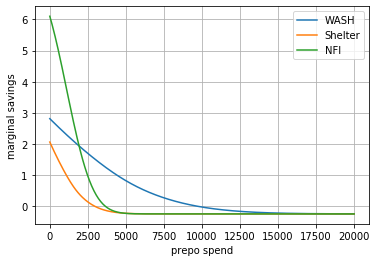

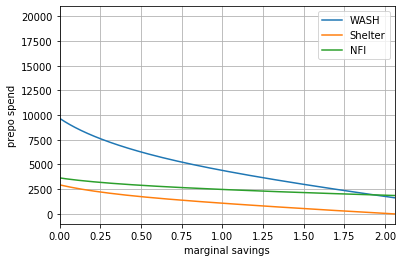

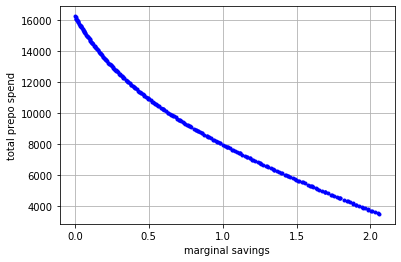

In [4]:
# The following 5 inputs are currently set (no user prompt). This can be changed later is user control viewed as worthwhile
seed = True                             # True if same seed used for each simulation (default is False); set to 'True' to reduce confounding of results across items
ind_plot_by_x = False                   # True if plots by spend for each item are created (default is False)
ind_plot_by_m = False                   # True if plots by marginal savings for each item are created (default is False)
all_plot_by_x = True                    # True if plot by spend for all items is created (default is False)
all_plot_by_m = True                    # True if plot by marginal savings for all items is created (default is False)

# Code to collect user inputs for computing, storing, and displaying results
print('INPUT FILE NAME')
print ('The calibration is stored in a csv file with data beginning in row 2 (see template file for data in each column)')
i_file_name = input('Input file name (eg, enter "Calibration_75a" for input file "Calibration_75a.csv"): ') + '.csv'

print('\nRANGE OF MARGINAL SAVINGS CURVES (minimum and maximum prepo investment per item)')
print('Marginal savings is computed for each item at levels of prepo over the specified range')
min_x = input('Minumum prepo value used in marginal savings function calc: ')
max_x = input('Maxumum prepo value used in marginal savings function calc: ')

print('\nGRANULARITY OF MARGINAL SAVINGS CURVES')
print('Enter the difference between two consecutive prepo values (ie, integer step size used for computing the curves)')
print('Note: As step size decreases (min value of 1), the accuracy of the functions increases (more points) and CPU time increases')
incr_x = input('Step size of marginal savings functions: ')

print('\nSAMPLE SIZE USED IN MARGINAL SAVINGS COMPUTATIONS')
print('Note: As sample size decreases, the accuracy of the functions increases (more precision) and CPU time increases')
print('The default sample size is set to 1000, which will apply if the answer to the next questions is anything other than "Y"')
n = 1000                                 # default sample size
if 'Y'== input('Sample size set to a value other than 1000?'):
    n = input('Sample size: ')

print('OUTPUT FILE NAME')
print ('The computed marginal savings functions are written to a csv file with the name entered below.')
o_file_name = input('Output file name (eg, enter "Results_75a" for output file "Results_75a.csv"): ') + '.csv'
    
#print('\n',i_file_name,min_x,max_x,incr_x,n,o_file_name)

# Plot the marginal savings and prepo spend functions for each item
data = Plot_fn(i_file_name,min_x,max_x,incr_x,n,seed,ind_plot_by_x,ind_plot_by_m,all_plot_by_x,all_plot_by_m)

# Consolidate the multidimensional data frame into a single data frame to be written to the user-specified file
results=data[0]
for i in range(1,len(data)):
    results=pd.concat([results,data[i]])

# Write the consolidated data frame to a csv file
results.to_csv(o_file_name,index=False)